# Analyse de données nutritionnelles : nettoyage des données
Important : le fichier "fr.openfoodfacts.org.products.csv" doit se trouver dans le répertoire courant.

## Initialisation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

pd.options.display.float_format = '{:,.3f}'.format
input_file = 'fr.openfoodfacts.org.products.csv'
output_file = 'off.csv'

## Chargement et inspection sommaire

### Chargement du fichier sous forme de DataFrame

In [2]:
data = pd.read_csv(input_file, delimiter='\t')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(data.info(memory_usage='deep')) # infos sur les données chargées

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 1.7 GB
None


### Liste des attributs

In [4]:
print(', '.join(data.columns.tolist()))

code, url, creator, created_t, created_datetime, last_modified_t, last_modified_datetime, product_name, generic_name, quantity, packaging, packaging_tags, brands, brands_tags, categories, categories_tags, categories_fr, origins, origins_tags, manufacturing_places, manufacturing_places_tags, labels, labels_tags, labels_fr, emb_codes, emb_codes_tags, first_packaging_code_geo, cities, cities_tags, purchase_places, stores, countries, countries_tags, countries_fr, ingredients_text, allergens, allergens_fr, traces, traces_tags, traces_fr, serving_size, no_nutriments, additives_n, additives, additives_tags, additives_fr, ingredients_from_palm_oil_n, ingredients_from_palm_oil, ingredients_from_palm_oil_tags, ingredients_that_may_be_from_palm_oil_n, ingredients_that_may_be_from_palm_oil, ingredients_that_may_be_from_palm_oil_tags, nutrition_grade_uk, nutrition_grade_fr, pnns_groups_1, pnns_groups_2, states, states_tags, states_fr, main_category, main_category_fr, image_url, image_small_url, ene

### Suppressions des colonnes de données d'audit

In [5]:
columns_to_delete = ['created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime']
data.drop(columns=columns_to_delete, inplace=True, errors='ignore')
print(f"{len(columns_to_delete)} colonnes effacées.")

4 colonnes effacées.


### Examen des colonnes avec valeurs manquantes

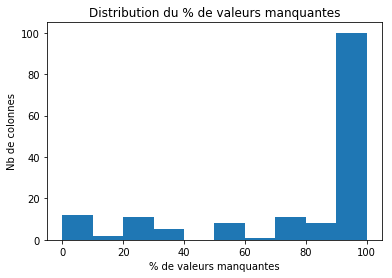

In [6]:
missing_values = data.isnull().sum(axis=0).to_frame(name='count_missing') # nb de valeurs manquantes par colonn
missing_values.sort_values(by=['count_missing'], inplace=True) # tri pour l'affichage
missing_values['percent_missing'] = missing_values['count_missing'] / len(data) * 100 # calcul du %
fig, axes = plt.subplots()
axes.hist(missing_values['percent_missing'], bins=10);
axes.set_title('Distribution du % de valeurs manquantes');
axes.set_xlabel('% de valeurs manquantes');
axes.set_ylabel('Nb de colonnes');

In [7]:
print(f"Colonnes ne contenant aucune valeur :")
print(missing_values[missing_values['count_missing'] == len(data)])

Colonnes ne contenant aucune valeur :
                                       count_missing  percent_missing
ingredients_from_palm_oil                     320772          100.000
chlorophyl_100g                               320772          100.000
lignoceric-acid_100g                          320772          100.000
cerotic-acid_100g                             320772          100.000
melissic-acid_100g                            320772          100.000
glycemic-index_100g                           320772          100.000
elaidic-acid_100g                             320772          100.000
mead-acid_100g                                320772          100.000
erucic-acid_100g                              320772          100.000
nervonic-acid_100g                            320772          100.000
caproic-acid_100g                             320772          100.000
butyric-acid_100g                             320772          100.000
nutrition_grade_uk                            320772

In [8]:
columns_to_delete = missing_values[missing_values['count_missing'] == len(data)].index.values
data.drop(columns=columns_to_delete, inplace=True, errors='ignore') 
missing_values.drop(index=columns_to_delete, inplace=True) # ignore colonnes vides dans la suite de l'analyse
print(f"{len(columns_to_delete)} colonnes effacées.")

16 colonnes effacées.


In [9]:
threshold = 20 
print(f"Colonnes avec moins de {threshold}% valeurs manquantes :")
print(missing_values[missing_values['percent_missing'] < threshold])

Colonnes avec moins de 20% valeurs manquantes :
                count_missing  percent_missing
creator                     2            0.001
code                       23            0.007
url                        23            0.007
states                     46            0.014
states_tags                46            0.014
states_fr                  46            0.014
countries_tags            280            0.087
countries                 280            0.087
countries_fr              280            0.087
product_name            17762            5.537
brands                  28412            8.857
brands_tags             28420            8.860
energy_100g             59659           18.599
proteins_100g           60850           18.970


In [10]:
threshold = 99.99
print(f"Colonnes avec plus de {threshold}% valeurs manquantes :")
print(missing_values[missing_values['percent_missing'] > threshold])

Colonnes avec plus de 99.99% valeurs manquantes :
                                  count_missing  percent_missing
taurine_100g                             320743           99.991
casein_100g                              320745           99.992
glucose_100g                             320746           99.992
arachidic-acid_100g                      320748           99.993
gamma-linolenic-acid_100g                320748           99.993
cities                                   320749           99.993
behenic-acid_100g                        320749           99.993
dihomo-gamma-linolenic-acid_100g         320749           99.993
omega-9-fat_100g                         320751           99.993
chromium_100g                            320752           99.994
allergens_fr                             320753           99.994
serum-proteins_100g                      320756           99.995
gondoic-acid_100g                        320758           99.996
oleic-acid_100g                         

### Suppressions des colonnes contenant moins de 100 valeurs
Nous renonçons à exploiter les colonnes qui contiennent trop peu de données. La valeur de seuil retenue est arbitraire, et nous serons peut-être amenés à la modifier. 

In [11]:
columns_to_delete = missing_values[missing_values['count_missing'] > len(data) - 100].index
print(', '.join(columns_to_delete))
data.drop(columns=columns_to_delete, inplace=True, errors='ignore') 
print(f"{len(columns_to_delete)} colonnes effacées.")

bicarbonate_100g, fluoride_100g, docosahexaenoic-acid_100g, caffeine_100g, sucrose_100g, ph_100g, eicosapentaenoic-acid_100g, fructose_100g, silica_100g, beta-carotene_100g, taurine_100g, casein_100g, glucose_100g, arachidic-acid_100g, gamma-linolenic-acid_100g, cities, behenic-acid_100g, dihomo-gamma-linolenic-acid_100g, omega-9-fat_100g, chromium_100g, allergens_fr, serum-proteins_100g, gondoic-acid_100g, oleic-acid_100g, maltodextrins_100g, molybdenum_100g, nucleotides_100g, arachidonic-acid_100g, maltose_100g, lauric-acid_100g, capric-acid_100g, caprylic-acid_100g, myristic-acid_100g, palmitic-acid_100g, stearic-acid_100g, montanic-acid_100g
36 colonnes effacées.


### Liste des colonnes normalisées (avec le suffixe '_tags')

In [12]:
tags_cols = [col for col in data.columns if '_tags' in col] # list de colonnes terminant par '_tags'
print(', '.join(tags_cols))
print(f"({len(tags_cols)} colonnes trouvées)")

packaging_tags, brands_tags, categories_tags, origins_tags, manufacturing_places_tags, labels_tags, emb_codes_tags, cities_tags, countries_tags, traces_tags, additives_tags, ingredients_from_palm_oil_tags, ingredients_that_may_be_from_palm_oil_tags, states_tags
(14 colonnes trouvées)


In [13]:
raw_cols = [col[:-5] for col in tags_cols if col[:-5] in data.columns]
for col in raw_cols:
    s = data.groupby([col, col+'_tags']).size().sort_values(ascending=False)
    print(f"Valeur la plus courante pour {col}: {s.index[0]} {s[0]}")

Valeur la plus courante pour packaging: ('Carton', 'carton') 2153
Valeur la plus courante pour brands: ('Carrefour', 'carrefour') 2978
Valeur la plus courante pour categories: ('Snacks sucrés,Biscuits et gâteaux,Biscuits', 'en:sugary-snacks,en:biscuits-and-cakes,en:biscuits') 293
Valeur la plus courante pour origins: ('France', 'france') 5171
Valeur la plus courante pour manufacturing_places: ('France', 'france') 9371
Valeur la plus courante pour labels: ('Organic, EU Organic, fr:AB Agriculture Biologique', 'en:organic,en:eu-organic,fr:ab-agriculture-biologique') 3220
Valeur la plus courante pour emb_codes: ('EMB 56251E', 'emb-56251e') 218
Valeur la plus courante pour countries: ('US', 'en:united-states') 169928
Valeur la plus courante pour traces: ('Fruits à coque', 'en:nuts') 1240
Valeur la plus courante pour additives: (' [ semolina -> en:semolina  ]  [ wheat -> en:wheat  ]  [ durum-flour -> en:durum-flour  ]  [ flour -> en:flour  ]  [ wheat -> en:wheat  ]  [ niacin -> en:e375  -> e

### Nous décidons de ne conserver que la version normalisée de chaque colonne

In [14]:
data.drop(columns=raw_cols, inplace=True, errors='ignore') 
print(f"{len(raw_cols)} colonnes effacées.")

11 colonnes effacées.


## Examen des colonnes hors informations nutritionnelles

In [15]:
def print_col_info(column):
    if column in data.columns:
        num_na = data[column].isnull().sum()
        print(f"Nombre d'entrées manquantes : {num_na} ({num_na/len(data)*100:0.2f}%)")
        #unique_vals = data[[column]].groupby(column).size().sort_values(ascending=False)
        unique_vals = data[column].value_counts().sort_values(ascending=False)
        num_samples = 10
        print("Valeurs les plus courantes : " + ' ; '.join(str(x) for x in unique_vals.iloc[:num_samples].index))

### Marque

In [16]:
print_col_info('brands_tags')

Nombre d'entrées manquantes : 28420 (8.86%)
Valeurs les plus courantes : carrefour ; auchan ; u ; meijer ; leader-price ; casino ; kroger ; ahold ; spartan ; roundy-s


Cet attribut, bien qu'a priori sans lien direct avec la qualité nutritionnelle du produit, pourrait toutefois présenter une corrélation avec sa qualité ; nous le conservons donc.

### Conditionnement

In [17]:
print_col_info('packaging_tags')

Nombre d'entrées manquantes : 241811 (75.38%)
Valeurs les plus courantes : sachet,plastique ; carton ; plastique ; barquette,plastique ; bouteille,verre ; conserve ; bouteille,plastique ; bocal,verre ; kunststoff ; carton,plastique


In [18]:
print_col_info('quantity')

Nombre d'entrées manquantes : 215953 (67.32%)
Valeurs les plus courantes : 500 g ; 200 g ; 250 g ; 100 g ; 400 g ; 300 g ; 150 g ; 1 l ; 1 kg ; 125 g


In [19]:
print_col_info('serving_size')

Nombre d'entrées manquantes : 109441 (34.12%)
Valeurs les plus courantes : 240 ml (8 fl oz) ; 28 g (1 oz) ; 28 g (1 ONZ) ; 15 ml (1 Tbsp) ; 30 g (2 Tbsp) ; 30 g ; 30 g (0.25 cup) ; 240 ml (1 cup) ; 14 g (1 Tbsp) ; 30 ml (2 Tbsp)


La qualité nutritionnel d'un produit est indépendante de son conditionnement : ces colonnes ne nous serons donc pas utiles.

### Lieux de vente

In [20]:
print_col_info('stores')

Nombre d'entrées manquantes : 269050 (83.88%)
Valeurs les plus courantes : Carrefour ; Auchan ; Leclerc ; Cora ; Intermarché ; Lidl ; Franprix ; Aldi ; Super U ; Casino


In [21]:
print_col_info('countries_tags')

Nombre d'entrées manquantes : 280 (0.09%)
Valeurs les plus courantes : en:united-states ; en:france ; en:switzerland ; en:germany ; en:spain ; en:united-kingdom ; en:belgium ; en:australia ; en:russia ; en:france,en:switzerland


In [22]:
print_col_info('countries_fr')

Nombre d'entrées manquantes : 280 (0.09%)
Valeurs les plus courantes : États-Unis ; France ; Suisse ; Allemagne ; Espagne ; Royaume-Uni ; Belgique ; Australie ; Russie ; France,Suisse


In [23]:
print_col_info('purchase_places')

Nombre d'entrées manquantes : 262579 (81.86%)
Valeurs les plus courantes : France ; Lyon,France ; Courrières,France ; Madrid,España ; Paris,France ; España ; Rennes,France ; Deutschland ; Liverpool,United Kingdom ; France,Nantes


Ces attributs ne nous renseignent pas sur la qualité du produit.

### Source des données

In [24]:
print_col_info('creator')

Nombre d'entrées manquantes : 2 (0.00%)
Valeurs les plus courantes : usda-ndb-import ; openfoodfacts-contributors ; kiliweb ; date-limite-app ; openfood-ch-import ; tacite ; sebleouf ; tacinte ; javichu ; stephane


Il est possible qu'il existe une corrélation entre source et qualité des données : à conserver.

### Nature du produit

In [25]:
print_col_info('categories_tags')

Nombre d'entrées manquantes : 236383 (73.69%)
Valeurs les plus courantes : en:sugary-snacks,en:biscuits-and-cakes,en:biscuits ; en:sugary-snacks,en:chocolates,en:dark-chocolates ; en:sugary-snacks,en:confectioneries,en:candies ; en:plant-based-foods-and-beverages,en:plant-based-foods,en:breakfasts,en:cereals-and-potatoes,en:cereals-and-their-products,en:breakfast-cereals ; en:sugary-snacks,en:biscuits-and-cakes,en:biscuits,en:chocolate-biscuits ; en:salty-snacks,en:appetizers,en:crackers ; en:dairies,en:yogurts ; en:sugary-snacks,en:chocolates,en:milk-chocolates ; en:sugary-snacks,en:chocolates ; en:groceries,en:sauces


In [26]:
print_col_info('categories_fr')

Nombre d'entrées manquantes : 236361 (73.69%)
Valeurs les plus courantes : Snacks sucrés,Biscuits et gâteaux,Biscuits ; Snacks sucrés,Chocolats,Chocolats noirs ; Snacks sucrés,Confiseries,Bonbons ; Aliments et boissons à base de végétaux,Aliments d'origine végétale,Petit-déjeuners,Céréales et pommes de terre,Céréales et dérivés,Céréales pour petit-déjeuner ; Snacks sucrés,Biscuits et gâteaux,Biscuits,Biscuits au chocolat ; Snacks salés,Apéritif,Biscuits apéritifs ; Produits laitiers,Yaourts ; Snacks sucrés,Chocolats,Chocolats au lait ; Snacks sucrés,Chocolats ; Epicerie,Sauces


In [27]:
print_col_info('main_category')

Nombre d'entrées manquantes : 236406 (73.70%)
Valeurs les plus courantes : en:beverages ; en:groceries ; en:chocolates ; en:plant-based-foods-and-beverages ; en:canned-foods ; en:biscuits ; en:meals ; en:sugary-snacks ; en:frozen-foods ; en:breakfasts


In [28]:
print_col_info('main_category_fr')

Nombre d'entrées manquantes : 236406 (73.70%)
Valeurs les plus courantes : Boissons ; Epicerie ; Chocolats ; Aliments et boissons à base de végétaux ; Conserves ; Biscuits ; Plats préparés ; Snacks sucrés ; Surgelés ; Petit-déjeuners


In [29]:
print_col_info('pnns_groups_1')

Nombre d'entrées manquantes : 229259 (71.47%)
Valeurs les plus courantes : unknown ; Sugary snacks ; Beverages ; Milk and dairy products ; Cereals and potatoes ; Fish Meat Eggs ; Composite foods ; Fruits and vegetables ; Fat and sauces ; Salty snacks


In [30]:
print_col_info('pnns_groups_2')

Nombre d'entrées manquantes : 226281 (70.54%)
Valeurs les plus courantes : unknown ; One-dish meals ; Sweets ; Biscuits and cakes ; Non-sugared beverages ; Cereals ; Cheese ; Dressings and sauces ; Milk and yogurt ; Processed meat


Nous ne conservons initialement que l'attribut `main_category`, seul facilement exploitable. À confirmer.

### Lieu de production ou de conditionnement

In [31]:
print_col_info('origins_tags')

Nombre d'entrées manquantes : 298619 (93.09%)
Valeurs les plus courantes : france ; union-europeenne ; espana ; italie ; espagne ; australia ; deutschland ; belgique ; agricultura-ue,agricultura-no-ue ; suisse


In [32]:
print_col_info('manufacturing_places_tags')

Nombre d'entrées manquantes : 284277 (88.62%)
Valeurs les plus courantes : france ; italie ; deutschland ; belgique ; suisse ; allemagne ; australia ; espagne ; united-kingdom ; france,bretagne


In [33]:
print_col_info('emb_codes_tags')

Nombre d'entrées manquantes : 291469 (90.86%)
Valeurs les plus courantes : emb-56251e ; fr-85-154-002-ec ; emb-49331h ; fr-72-264-002-ec ; emb-45273 ; fr-29-247-022-ec ; fr-22-046-001-ec ; fr-62-767-005-ec ; fr-40-261-001-ec ; fr-72-181-001-ec


In [34]:
print_col_info('first_packaging_code_geo') # coordonnées du lieu de conditionnement

Nombre d'entrées manquantes : 301969 (94.14%)
Valeurs les plus courantes : 47.633333,-2.666667 ; 47.833333,-0.333333 ; 49.266667,-0.666667 ; 48.1,-4.333333 ; 46.698333,-1.939444 ; 47.933333,-4.016667 ; 46.666667,-0.85 ; 47.866667,2.116667 ; 46.783333,-0.833333 ; 48,-4.1


In [35]:
print_col_info('cities_tags')

Nombre d'entrées manquantes : 300452 (93.67%)
Valeurs les plus courantes : theix-morbihan-france ; douarnenez-finistere-france ; sable-sur-sarthe-sarthe-france ; saint-martin-des-entrees-calvados-france ; mouilleron-en-pareds-vendee-france ; saint-evarzec-finistere-france ; quimper-finistere-france ; chateaubourg-ille-et-vilaine-france ; saint-denis-de-l-hotel-loiret-france ; pouzauges-vendee-france


Ces attributs pourraient être utile dans le cadre d'une démarche écologique de limitation du transport des produits, ce qui n'est pas notre cas.

### Certifications

In [36]:
print_col_info('labels_tags')

Nombre d'entrées manquantes : 274128 (85.46%)
Valeurs les plus courantes : en:organic,en:eu-organic,fr:ab-agriculture-biologique ; en:green-dot ; en:vegetarian,en:vegan ; en:green-dot,fr:eco-emballages ; en:organic,en:eu-organic,en:fr-bio-01,fr:ab-agriculture-biologique ; en:gluten-free ; en:labels-of-distributors,fr:selection-intermarche ; en:pdo ; en:no-colorings,en:no-preservatives ; en:vegetarian


In [37]:
print_col_info('labels_fr')

Nombre d'entrées manquantes : 274106 (85.45%)
Valeurs les plus courantes : Bio,Bio européen,AB Agriculture Biologique ; Point Vert ; Végétarien,Végétalien ; Point Vert,Eco-emballages ; Bio,Bio européen,FR-BIO-01,AB Agriculture Biologique ; Sans gluten ; Labels de distributeurs,Sélection Intermarché ; AOP ; Sans colorants,Sans conservateurs ; Végétarien


Certains de ces labels sont des indicateurs de qualité sur lesquels nous pourrons nous appuyer : nous conservons la 1ère colonne, mais pas la 2e (redondante).

In [38]:
data['carbon-footprint_100g'] = data['carbon-footprint_100g'].round(2) # arrondissons à 2 décimales
print_col_info('carbon-footprint_100g')

Nombre d'entrées manquantes : 320504 (99.92%)
Valeurs les plus courantes : 0.0 ; 828.0 ; 160.0 ; 150.0 ; 153.0 ; 345.0 ; 365.0 ; 100.0 ; 56.2 ; 340.0


L'empreinte carbone d'un aliment est sens lien avec ses qualités nutritionnelles : à effacer.

### Informations techniques

In [39]:
print_col_info('url')

Nombre d'entrées manquantes : 23 (0.01%)
Valeurs les plus courantes : http://world-fr.openfoodfacts.org/produit/3041090007866 ; http://world-fr.openfoodfacts.org/produit/0712199082803/sour-jelly-beens-sweet-smiles ; http://world-fr.openfoodfacts.org/produit/9388160480827/biscottes-6-cereales-heudebert ; http://world-fr.openfoodfacts.org/produit/20408459/witti-s-au-sesame-crusti-croc ; http://world-fr.openfoodfacts.org/produit/9300605042438 ; http://world-fr.openfoodfacts.org/produit/0011225123887/potato-chips-valu-time ; http://world-fr.openfoodfacts.org/produit/0832924004143/garlic-spread-matiz-catalan ; http://world-fr.openfoodfacts.org/produit/0093966004540/soy-creamer-french-vanilla-organic-valley ; http://world-fr.openfoodfacts.org/produit/3700410341058/reine-des-neige-coca ; http://world-fr.openfoodfacts.org/produit/0041735083531/old-fashioned-soft-cookies-strawberry-filled-price-chopper


In [40]:
print_col_info('image_url')

Nombre d'entrées manquantes : 244936 (76.36%)
Valeurs les plus courantes : http://fr.openfoodfacts.org/images/products/848/000/082/3908/front.3.400.jpg ; http://fr.openfoodfacts.org/images/products/800/535/704/3047/front.3.400.jpg ; http://fr.openfoodfacts.org/images/products/406/960/000/9437/front.5.400.jpg ; http://fr.openfoodfacts.org/images/products/303/361/003/5459/front.7.400.jpg ; http://fr.openfoodfacts.org/images/products/349/357/000/0032/front.5.400.jpg ; http://fr.openfoodfacts.org/images/products/401/563/784/3100/front.6.400.jpg ; http://fr.openfoodfacts.org/images/products/317/568/110/3849/front.12.400.jpg ; http://fr.openfoodfacts.org/images/products/317/853/041/0143/front.3.400.jpg ; http://fr.openfoodfacts.org/images/products/004/837/501/4109/front.8.400.jpg ; http://fr.openfoodfacts.org/images/products/430/479/500/2482/front.9.400.jpg


In [41]:
print_col_info('image_small_url')

Nombre d'entrées manquantes : 244936 (76.36%)
Valeurs les plus courantes : http://fr.openfoodfacts.org/images/products/848/001/701/7284/front.8.200.jpg ; http://fr.openfoodfacts.org/images/products/329/259/080/5128/front.6.200.jpg ; http://fr.openfoodfacts.org/images/products/308/368/105/7737/front.3.200.jpg ; http://fr.openfoodfacts.org/images/products/376/003/870/7063/front.3.200.jpg ; http://fr.openfoodfacts.org/images/products/200/000/002/0872/front.4.200.jpg ; http://fr.openfoodfacts.org/images/products/80019442/front.3.200.jpg ; http://fr.openfoodfacts.org/images/products/460/172/801/2380/front.3.200.jpg ; http://fr.openfoodfacts.org/images/products/327/307/102/8311/front.7.200.jpg ; http://fr.openfoodfacts.org/images/products/359/671/030/8927/front.6.200.jpg ; http://fr.openfoodfacts.org/images/products/20063722/front.3.200.jpg


In [42]:
print_col_info('states_tags')

Nombre d'entrées manquantes : 46 (0.01%)
Valeurs les plus courantes : en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-uploaded ; en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uploaded ; en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uplo

Attributs inutiles pour notre projet.

## Examen des colonnes d'informations nutritionnelles non quantitatives

In [43]:
print_col_info('ingredients_text')

Nombre d'entrées manquantes : 71810 (22.39%)
Valeurs les plus courantes : Carbonated water, natural flavor. ; Almonds. ; Extra virgin olive oil. ; Extra virgin olive oil ; Semolina (wheat), durum flour (wheat), niacin, ferrous sulfate (iron), thiamin mononitrate, riboflavin, folic acid. ; Honey ; Walnuts. ; Pecans. ; Green beans, water, salt. ; Honey.


Attribut potentiellement utile, mais difficilement exploitable en l'état : nous le supprimons (à discuter avec le client).

In [44]:
print_col_info('allergens')

Nombre d'entrées manquantes : 292428 (91.16%)
Valeurs les plus courantes : blé ; Lait ; lait ; soja ; sulfites ; céleri ; Lait, lait ; orge ; lactose ; blé, blé


Attribut utile.

In [45]:
print_col_info('traces_tags')

Nombre d'entrées manquantes : 296443 (92.42%)
Valeurs les plus courantes : en:nuts ; en:milk ; en:eggs ; en:gluten ; en:nuts,en:peanuts ; en:milk,en:nuts ; en:nuts,en:soybeans ; en:soybeans ; en:sulphur-dioxide-and-sulphites ; en:gluten,en:nuts


In [46]:
print_col_info('traces_fr')

Nombre d'entrées manquantes : 296420 (92.41%)
Valeurs les plus courantes : Fruits à coque ; Lait ; Œufs ; Gluten ; Fruits à coque,Arachides ; Lait,Fruits à coque ; Fruits à coque,Soja ; Soja ; Anhydride sulfureux et sulfites ; Gluten,Fruits à coque


La présence de certaines substances à l'état de traces est sans incidence sur la qualité nutritionnelle du produit : à supprimer.

In [47]:
print_col_info('additives_n')

Nombre d'entrées manquantes : 71833 (22.39%)
Valeurs les plus courantes : 0.0 ; 1.0 ; 2.0 ; 3.0 ; 4.0 ; 5.0 ; 6.0 ; 7.0 ; 8.0 ; 9.0


In [48]:
print_col_info('additives_tags')

Nombre d'entrées manquantes : 166092 (51.78%)
Valeurs les plus courantes : en:e322 ; en:e330 ; en:e375,en:e101 ; en:e300 ; en:e415 ; en:e440 ; en:e100 ; en:e330,en:e300 ; en:e160b ; en:e150a


In [49]:
print_col_info('additives_fr')

Nombre d'entrées manquantes : 166092 (51.78%)
Valeurs les plus courantes : E322 - Lécithines ; E330 - Acide citrique ; E375 - Acide nicotinique,E101 - Riboflavine ; E300 - Acide ascorbique ; E415 - Gomme xanthane ; E440 - Pectines ; E100 - Curcumine ; E330 - Acide citrique,E300 - Acide ascorbique ; E160b - Rocou ; E150a - Caramel E150a


Attribut redondant.

In [50]:
print_col_info('ingredients_from_palm_oil_n')

Nombre d'entrées manquantes : 71833 (22.39%)
Valeurs les plus courantes : 0.0 ; 1.0 ; 2.0


In [51]:
print_col_info('ingredients_from_palm_oil_tags')

Nombre d'entrées manquantes : 315937 (98.49%)
Valeurs les plus courantes : huile-de-palme ; e304-palmitate-d-ascorbyle ; huile-de-palme,e304-palmitate-d-ascorbyle ; oleine-de-palme ; mono-et-diglycerides-d-acides-gras-de-palme ; huile-de-palme,oleine-de-palme ; e304-palmitate-d-ascorbyle,huile-de-palme ; huile-de-palme,stearine-de-palme ; oleine-de-palme,e304-palmitate-d-ascorbyle ; huile-de-palme,mono-et-diglycerides-d-acides-gras-de-palme


In [52]:
print_col_info('ingredients_that_may_be_from_palm_oil_n')

Nombre d'entrées manquantes : 71833 (22.39%)
Valeurs les plus courantes : 0.0 ; 1.0 ; 2.0 ; 3.0 ; 4.0 ; 5.0 ; 6.0


In [53]:
print_col_info('ingredients_that_may_be_from_palm_oil_tags')

Nombre d'entrées manquantes : 309076 (96.35%)
Valeurs les plus courantes : e160a-beta-carotene ; e471-mono-et-diglycerides-d-acides-gras-alimentaires ; huile-vegetale ; e433-monooleate-de-polyoxyethylene-de-sorbitane ; e471-mono-et-diglycerides-d-acides-gras-alimentaires,e160a-beta-carotene ; huile-vegetale,e471-mono-et-diglycerides-d-acides-gras-alimentaires ; e471-mono-et-diglycerides-d-acides-gras-alimentaires,e481-stearoyl-2-lactylate-de-sodium ; e472e-ester-monoacethyltartrique-de-mono-et-diglycerides-d-acides-gras ; e471-mono-et-diglycerides-d-acides-gras-alimentaires,e472e-ester-monoacethyltartrique-de-mono-et-diglycerides-d-acides-gras ; e472b-ester-diacetyl-lactique-de-mono-et-diglycerides-d-acides-gras


Nous ne conserverons initialement que le nombre avéré d'ingrédients dérivés de l'huile de palme.

In [54]:
print_col_info('nutrition-score-fr_100g')

Nombre d'entrées manquantes : 99562 (31.04%)
Valeurs les plus courantes : 0.0 ; 1.0 ; 14.0 ; 2.0 ; 13.0 ; -1.0 ; 12.0 ; 11.0 ; 3.0 ; 15.0


In [55]:
print_col_info('nutrition-score-uk_100g')

Nombre d'entrées manquantes : 99562 (31.04%)
Valeurs les plus courantes : 0.0 ; 1.0 ; 2.0 ; 14.0 ; -1.0 ; 13.0 ; 12.0 ; 11.0 ; 3.0 ; 20.0


In [56]:
print_col_info('nutrition_grade_fr')

Nombre d'entrées manquantes : 99562 (31.04%)
Valeurs les plus courantes : d ; c ; e ; a ; b


D'après la documentation sur la page https://fr.openfoodfacts.org/nutriscore, les scores numériques fr et uk donnent des valeurs proches, qui sont ensuite utilisées pour l'attribution d'une lettre Nutri-Score. Nous ne conservons que ce dernier attribut.

## Examen des colonnes d'informations nutritionnelles quantitatives

## Suppression des colonnes

In [57]:
columns_to_delete = ['packaging_tags', 'quantity', 'serving_size', 
                     'stores', 'countries_tags', 'countries_fr', 
                     'purchase_places', 
                     'categories_tags', 'categories_fr', 'main_category_fr', 'pnns_groups_1', 'pnns_groups_2',
                     'origins_tags', 
                     'manufacturing_places_tags', 'emb_codes_tags', 'first_packaging_code_geo', 
                     'cities_tags', 'labels_fr', 'carbon-footprint_100g',
                     'url', 'image_url', 'image_small_url', 'states_tags', 'states_fr', 'ingredients_text',
                     'traces_tags', 'traces_fr', 'additives_fr',
                     'ingredients_from_palm_oil_tags', 
                     'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_tags',
                     'nutrition-score-fr_100g', 'nutrition-score-uk_100g']
data.drop(columns=columns_to_delete, inplace=True, errors='ignore') 
print(f"{len(columns_to_delete)} colonnes effacées.")

33 colonnes effacées.


## Sauvegarde de la version finale

In [58]:
print(", ".join(data.columns.tolist()))

code, creator, product_name, generic_name, brands_tags, labels_tags, allergens, additives_n, additives_tags, ingredients_from_palm_oil_n, nutrition_grade_fr, main_category, energy_100g, energy-from-fat_100g, fat_100g, saturated-fat_100g, monounsaturated-fat_100g, polyunsaturated-fat_100g, omega-3-fat_100g, alpha-linolenic-acid_100g, omega-6-fat_100g, linoleic-acid_100g, trans-fat_100g, cholesterol_100g, carbohydrates_100g, sugars_100g, lactose_100g, starch_100g, polyols_100g, fiber_100g, proteins_100g, salt_100g, sodium_100g, alcohol_100g, vitamin-a_100g, vitamin-d_100g, vitamin-e_100g, vitamin-k_100g, vitamin-c_100g, vitamin-b1_100g, vitamin-b2_100g, vitamin-pp_100g, vitamin-b6_100g, vitamin-b9_100g, folates_100g, vitamin-b12_100g, biotin_100g, pantothenic-acid_100g, potassium_100g, chloride_100g, calcium_100g, phosphorus_100g, iron_100g, magnesium_100g, zinc_100g, copper_100g, manganese_100g, selenium_100g, iodine_100g, fruits-vegetables-nuts_100g, collagen-meat-protein-ratio_100g, c

In [59]:
print(data.info(memory_usage='deep')) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 62 columns):
code                                320749 non-null object
creator                             320770 non-null object
product_name                        303010 non-null object
generic_name                        52795 non-null object
brands_tags                         292352 non-null object
labels_tags                         46644 non-null object
allergens                           28344 non-null object
additives_n                         248939 non-null float64
additives_tags                      154680 non-null object
ingredients_from_palm_oil_n         248939 non-null float64
nutrition_grade_fr                  221210 non-null object
main_category                       84366 non-null object
energy_100g                         261113 non-null float64
energy-from-fat_100g                857 non-null float64
fat_100g                            243891 non-null float64
satura

In [60]:
data.to_csv(output_file, sep='\t')
size = os.path.getsize(output_file) / 1024**2
print(f'Taille du fichier : {size:0.2f} MB')

Taille du fichier : 68.72 MB
